# Yelp Data Challenge - Data Preprocessing



## Read data from file and load to Pandas DataFrame



In [1]:
import json
import pandas as pd

#### Business Data

In [2]:
df_business= pd.read_csv("yelp_business.csv")

In [3]:
df_business.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...


In [4]:
df_business["city"].value_counts().head()

Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

Here I will focuse on the information in Las vegas since this contains the biggest amount of business. 

In [7]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category 

In [5]:
# Create Pandas DataFrame filters

# city Las Vegas: bool
cond_city = df_business['city'] == "Las Vegas"

# isnull: bool
cond_category_not_null = ~df_business["categories"].isnull()

# restaurant in categories
# first, apply(str) convert categories to strings,
# then check if it contains Restaurants
cond_category_restaurant = df_business["categories"].apply(str).str.contains("Restaurants")

In [6]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[cond_city & cond_category_not_null & cond_category_restaurant]

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [7]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [8]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [9]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={"stars":"avg_stars"}, inplace=True)

C:\Users\ella1\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [10]:
# Inspect your DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 52 to 174469
Data columns (total 4 columns):
business_id    5899 non-null object
name           5899 non-null object
categories     5899 non-null object
avg_stars      5899 non-null float64
dtypes: float64(1), object(3)
memory usage: 230.4+ KB


In [11]:
df_selected_business.head()

,business_id,name,categories,avg_stars
52,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Nightlife;Bars;Barbeque;Sports Bars;American (...,4.0
53,4srfPk1s8nlm1YusyDUbjg,"""Subway""",Fast Food;Restaurants;Sandwiches,2.5
54,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0
91,F0fEKpTk7gAmuSFI0KW1eQ,"""Cafe Mastrioni""",Italian;Restaurants,1.5
122,Wpt0sFHcPtV5MO9He7yMKQ,"""McDonald's""",Restaurants;Fast Food;Burgers,2.0


#### Save results to csv files

In [14]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv("selected_business.csv", index=False, encoding="utf-8")

In [15]:
# Try reload the csv file to check if everything works fine
pd.read_csv("selected_business.csv", encoding="utf-8").head()

,business_id,name,categories,avg_stars
0,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Nightlife;Bars;Barbeque;Sports Bars;American (...,4.0
1,4srfPk1s8nlm1YusyDUbjg,"""Subway""",Fast Food;Restaurants;Sandwiches,2.5
2,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Arcades;Arts & Entertainment;Gastropubs;Restau...,3.0
3,F0fEKpTk7gAmuSFI0KW1eQ,"""Cafe Mastrioni""",Italian;Restaurants,1.5
4,Wpt0sFHcPtV5MO9He7yMKQ,"""McDonald's""",Restaurants;Fast Food;Burgers,2.0


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [12]:
df_review = pd.read_csv("yelp_review.csv")

In [13]:
df_review.head(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0


#### Prepare dataframes to be joined, - on business_id

In [14]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [15]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
# Also filter date after '2016-02-01'
df_review = df_review[df_review['date']>'2016-02-01'].set_index('business_id')

#### Join! and reset index

In [16]:
# Join df_left and df_right. What type of join?
df_final = df_left.join(df_review,how='inner')

In [17]:
# You may want to reset the index 
df_final = df_final.reset_index()

In [21]:
df_final.head(2)

,business_id,name,categories,avg_stars,review_id,user_id,stars,date,text,useful,funny,cool
0,--9e1ONYQuAa-CB_Rrw7Tw,"""Delmonico Steakhouse""",Cajun/Creole;Steakhouses;Restaurants,4.0,6SgvNWJltnZhW7duJgZ42w,oFyOUOeGTRZhFPF9uTqrTQ,5,2016-03-31,This is mine and my fiancé's favorite steakhou...,0,0,0
1,--9e1ONYQuAa-CB_Rrw7Tw,"""Delmonico Steakhouse""",Cajun/Creole;Steakhouses;Restaurants,4.0,UxFpgng8dPMWOj99653k5Q,aVOGlN9fZ-BXcbtj6dbf0g,5,2016-02-10,Truly Fantastic! Best Steak ever. Service was...,0,0,0


### Distribution of stars across all resturants

In [22]:
import matplotlib.pyplot as plt

% matplotlib inline

(array([ 45487.,  28137.,  37059.,  71127., 166645.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

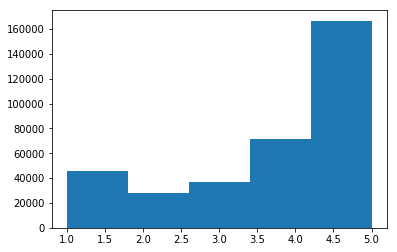

In [25]:
plt.hist(df_final['stars'], bins = 5)
# The histogram of the stars distribution. 

In [28]:
df_final["categories"].value_counts()

Mexican;Restaurants                                                                                                                                                4493
Pizza;Restaurants                                                                                                                                                  3952
Restaurants;Mexican                                                                                                                                                2797
Sandwiches;Buffets;Restaurants;Breakfast & Brunch;Food                                                                                                             2594
Italian;Restaurants                                                                                                                                                2521
American (New);Restaurants;Breakfast & Brunch                                                                                                                   

In [29]:
df_final["Mexican"] = df_final["categories"].apply(lambda x: "Mexic" in x)

In [31]:
df_final[df_final["Mexican"] == True]["stars"].value_counts()

5    16962
4     6396
1     5262
3     3588
2     2956
Name: stars, dtype: int64

(array([ 5262.,  2956.,  3588.,  6396., 16962.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

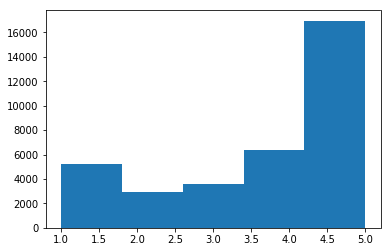

In [32]:
#pick mexican restrunt as an example 
plt.hist(df_final[df_final["Mexican"] == True]["stars"], bins = 5)

In [34]:
import numpy as np

### Who is the most popular. Top 20 mostly reviewed resturant

In [37]:
business_id = list(df_final.groupby(['business_id'])['review_id'].count().index)
resturant_name = [pd.unique(df_final[df_final['business_id'] == res]['name'])[0] for res in business_id]
popularity = list(df_final.groupby(['business_id'])['review_id'].count())

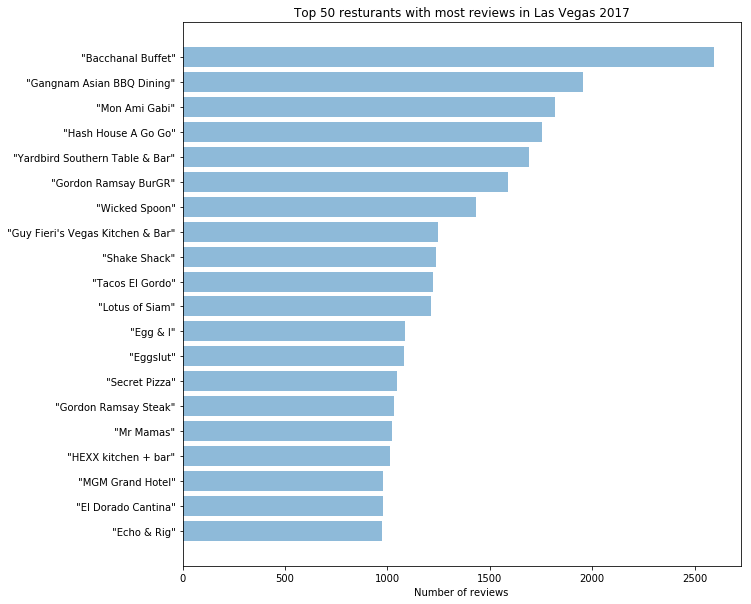

In [36]:

plt.figure(figsize=(10,10))
objects = [resturant_name[i] for i in np.argsort(popularity)[::-1][:20]]
y_pos = np.arange(len(objects))
plt.barh(y_pos, np.sort(popularity)[::-1][:20], align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of reviews')
plt.title('Top 20 resturants with most reviews in Las Vegas 2017')
plt.gca().invert_yaxis()

## Save preprocessed dataset to csv file



In [26]:

df_final.to_csv('last_2_years_restaurant_reviews.csv',index=False)